In [2]:
# https://www.raravind.com/blog/data-science/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network

# Identify Image Resolutions

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

# Get the Image Resolutions
root = 'C:/Users/David/Desktop/School/Photos/Original/'
imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 3630


,FileName,Size,Width,Height,Aspect Ratio
0,a.jpg,"(1317, 1225)",1317,1225,1.08
1,d.jpg,"(2676, 1239)",2676,1239,2.16
2,fortepan_100000.jpg,"(5386, 3572)",5386,3572,1.51
3,fortepan_100012.jpg,"(3385, 6000)",3385,6000,0.56
4,fortepan_100034.jpg,"(6000, 3798)",6000,3798,1.58


In [3]:
img_meta_df.mean(axis=0,numeric_only=True)

Width           2648.317906
Height          2207.789256
Aspect Ratio       1.299678
dtype: float64

Text(0, 0.5, 'Height')

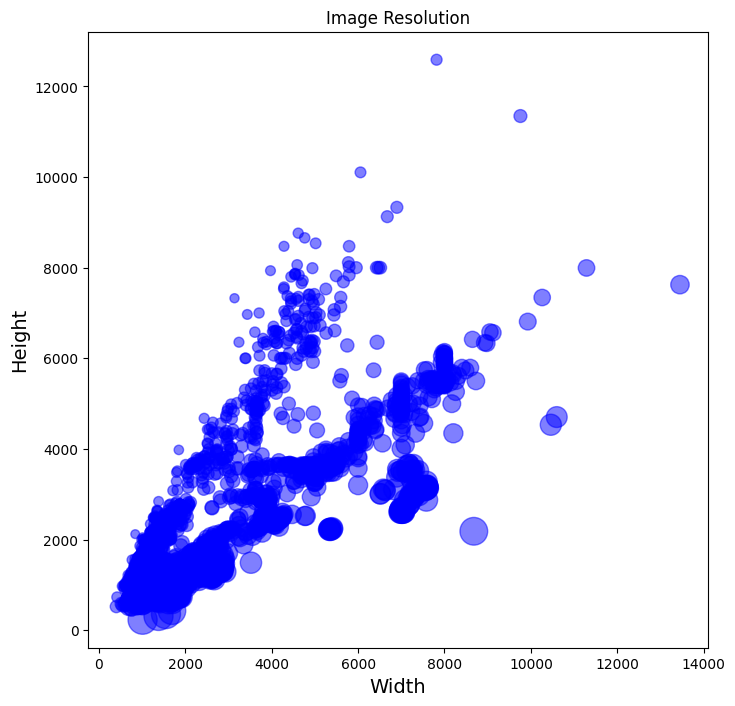

In [4]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)


In [5]:
# https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

import cv2
desiredFolder = 'C:/Users/David/Desktop/Diplomovka/Photos/Resized/'
desiredMaxSize = 1280

for index, row in img_meta_df.iterrows():
    # print(row['FileName'], row['Width'], row['Height'])
    pathToImg = root + row['FileName']
    img = cv2.imread(pathToImg, cv2.IMREAD_UNCHANGED) 
    # print('Original Dimensions : ',img.shape)
    
    imgHeight = img.shape[0]
    imgWidth = img.shape[1]

    #this will set maximal height/width do desired size and keep the original ratio 
    
    if imgHeight > imgWidth:  
        imgRatio = (imgHeight/desiredMaxSize)
        desiredWidth = round(imgWidth/imgRatio)
        desiredDim = (desiredWidth,desiredMaxSize)
        
    else:
        imgRatio = (imgWidth/desiredMaxSize)
        desiredHeight = round(imgHeight/imgRatio)
        desiredDim = (desiredMaxSize,desiredHeight)
        
    resizedImg = cv2.resize(img,desiredDim, interpolation = cv2.INTER_AREA)
    desiredPath = desiredFolder + row['FileName']
    cv2.imwrite(desiredPath, resizedImg)
    print(index)


KeyboardInterrupt: 

In [7]:
root = 'C:/Users/David/Desktop/School/Photos/Resized/'
imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 3630


,FileName,Size,Width,Height,Aspect Ratio
0,a.jpg,"(1280, 1191)",1280,1191,1.07
1,d.jpg,"(1280, 593)",1280,593,2.16
2,fortepan_100000.jpg,"(1280, 849)",1280,849,1.51
3,fortepan_100012.jpg,"(722, 1280)",722,1280,0.56
4,fortepan_100034.jpg,"(1280, 810)",1280,810,1.58


In [8]:
img_meta_df.mean(axis=0,numeric_only=True)

Width           1156.371074
Height           997.805785
Aspect Ratio       1.299515
dtype: float64

Text(0, 0.5, 'Height')

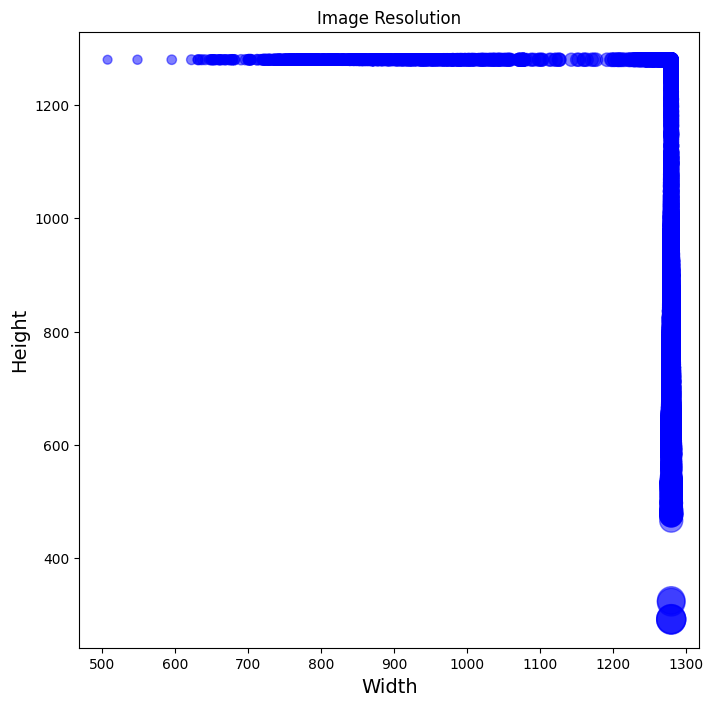

In [9]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)